## Problem

Given a classified data set from a company! They've hidden the feature column names but have given the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the data in a dataframe
df = pd.read_csv('KNN_Project_Data')

In [3]:
# checking data headers
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


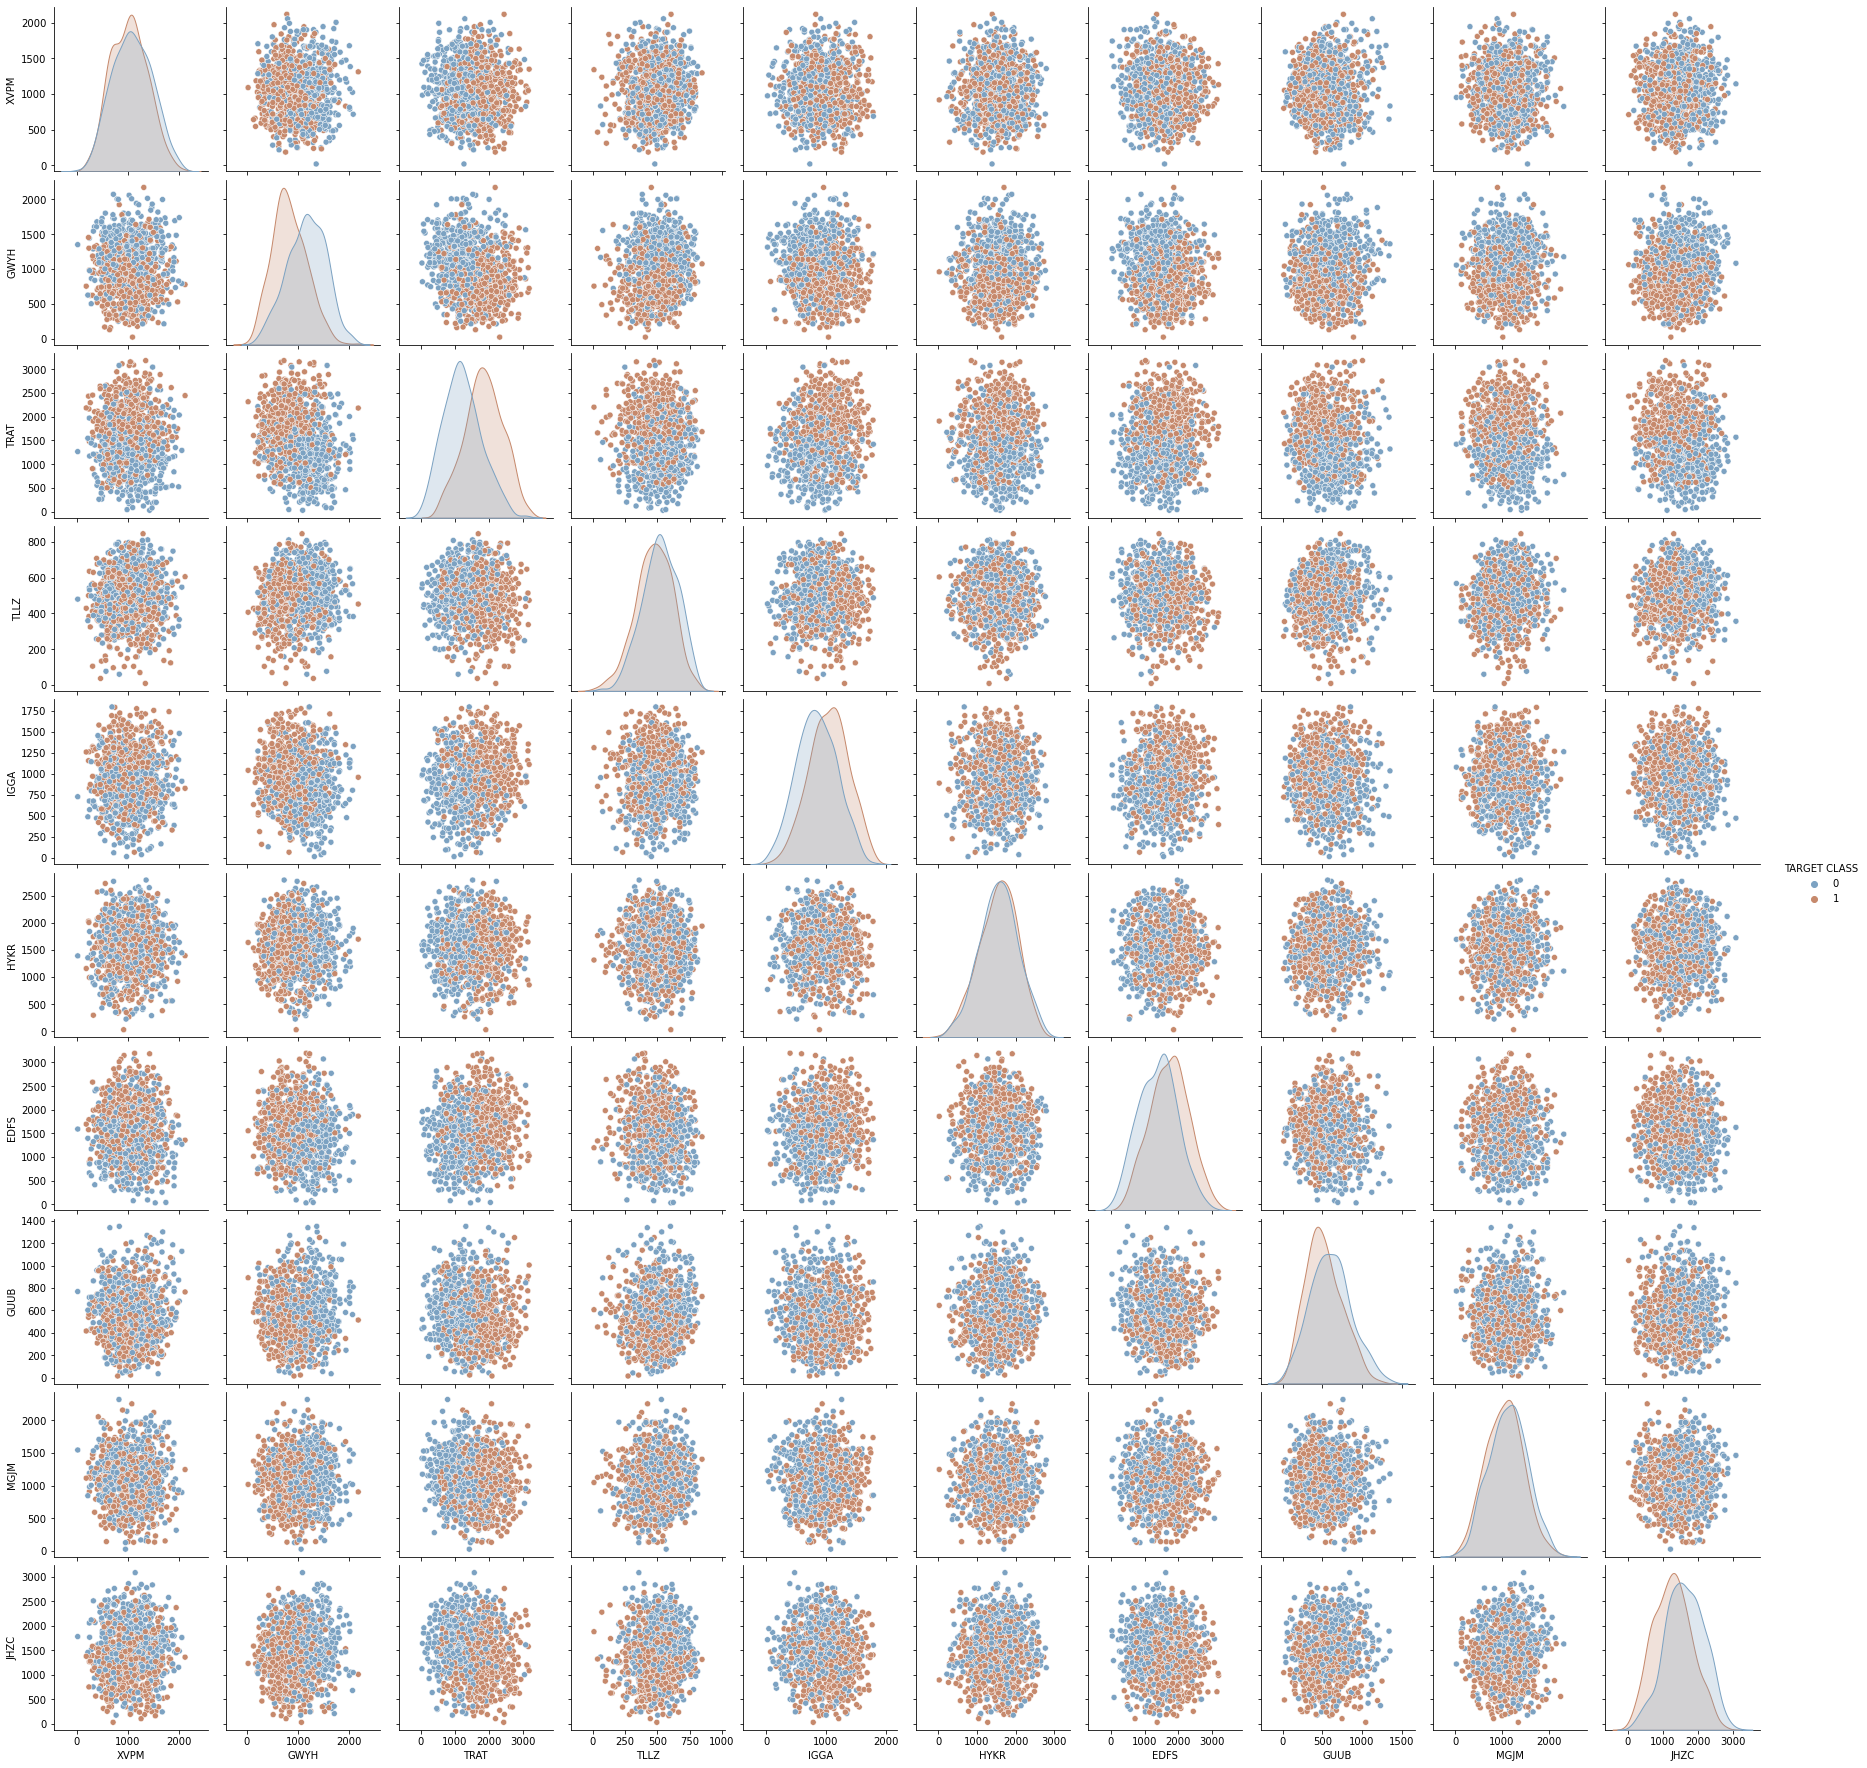

In [5]:
# Exploratory Data Analysis with pair plot
sns.pairplot(df, hue='TARGET CLASS', palette = 'twilight_shifted')

In [7]:
# standardiozing variables for KNN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
# fitting scaler to the features (except the target class variable)
scaler.fit(df.drop(['TARGET CLASS'],axis=1))

StandardScaler()

In [14]:
# transformig the features to a scaled version using .transform() method
scaled_feat = scaler.transform(df.drop(['TARGET CLASS'],axis=1))

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [11]:
# converting the scaled features into a dataframe and checking its head
df_feat = pd.DataFrame(scaled_feat, columns = df.columns[:-1])
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [44]:
# splitting data into training and testing samples 
# here X = df_feat & y = df['TARGET CLASS']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feat, df['TARGET CLASS'], test_size=0.33, random_state=42)

In [45]:
# using KNN (importing KNeighboursClassifier from sklearn) and creating an instance with 1 neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [46]:
# fitting to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [47]:
# prediction
pred = knn.predict(X_test)

In [48]:
# printing confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[119  44]
 [ 50 117]]


              precision    recall  f1-score   support

           0       0.70      0.73      0.72       163
           1       0.73      0.70      0.71       167

    accuracy                           0.72       330
   macro avg       0.72      0.72      0.72       330
weighted avg       0.72      0.72      0.72       330



In [49]:
# choosing K-value using elbow methhod
# Creating a for loop that trains various KNN models with different k values 
# keeping track of the error_rate for each of these models with a list

error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) #appending the error rate with the mean value of where the predictions were not equal to the test values

Text(0, 0.5, 'Error_Rate')

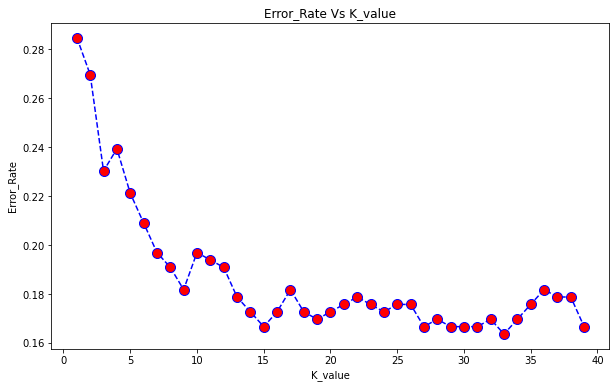

In [50]:
# plotting error_rate vs k_value
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', marker='o', linestyle='dashed',markerfacecolor='red', markersize=10)
plt.title('Error_Rate Vs K_value')
plt.xlabel('K_value')
plt.ylabel('Error_Rate')

In [51]:
# Retraining the model by selecting a different k-value from the above figure
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [52]:
# printing the new confusion matrix & classification report
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[140  23]
 [ 31 136]]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       163
           1       0.86      0.81      0.83       167

    accuracy                           0.84       330
   macro avg       0.84      0.84      0.84       330
weighted avg       0.84      0.84      0.84       330

